In [ ]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
import folium 
from folium import plugins
from tqdm.notebook import tqdm as tqdm


from pathlib import Path
data_dir = Path('../input/pima-indians-diabetes-database')


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew   
import pylab as p  
  
from pandas.plotting import scatter_matrix

import xgboost as xgb
from sklearn.metrics import mean_squared_error


from mlxtend.plotting import plot_decision_regions
from sklearn import metrics


In [ ]:
data = pd.read_csv(data_dir/'diabetes.csv')
data.head()

## EDA

In [ ]:
data.info()

In [ ]:
data.describe()

### Observation from above analysis
* The columnss  ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']  have their minimum value as Zero. These columns cannot have minimum value as zero.
* It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [ ]:
data1=data.copy(deep=True)
data1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(data1.isnull().sum())

### Visualization of distribution

In [ ]:
fig = make_subplots(rows=3, cols=3, subplot_titles=('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'))

trace0= go.Histogram(
    
    x=data['Pregnancies'],
    name="Pregnancies",
    opacity=0.75
)

trace1= go.Histogram(
    
    x=data['Glucose'],
    name="Glucose",
    opacity=0.75
)

trace2= go.Histogram(
    
    x=data['BloodPressure'],
    name="BloodPressure",
    opacity=0.75
)

trace3= go.Histogram(
    
    x=data['SkinThickness'],
    name="SkinThickness",
    opacity=0.75
)

trace4= go.Histogram(
    
    x=data['Insulin'],
    name="Insulin",
    opacity=0.75
)

trace5= go.Histogram(
    
    x=data['BMI'],
    name="BMI",
    opacity=0.75
)

trace6= go.Histogram(
    
    x=data['DiabetesPedigreeFunction'],
    name="DiabetesPedigreeFunction",
    opacity=0.75
)

trace7= go.Histogram(
    
    x=data['Age'],
    name="Age",
    opacity=0.75
)

trace8= go.Histogram(
    
    x=data['Outcome'],
    name="Outcome",
    opacity=0.75
)

fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)
fig.append_trace(trace2,1,3)
fig.append_trace(trace3,2,1)
fig.append_trace(trace4,2,2)
fig.append_trace(trace5,2,3)
fig.append_trace(trace6,3,1)
fig.append_trace(trace7,3,2)
fig.append_trace(trace8,3,3)

fig.update_layout(template="plotly_dark",title_text='<b>Visualization before dealing Nan values</b>',font=dict(family="Arial,Balto,Courier new,Droid sans",color='white'))
fig.show()

### Filling NaN values in data

In [ ]:
data1['Glucose'].fillna(data1['Glucose'].mean(), inplace = True)
data1['BloodPressure'].fillna(data1['BloodPressure'].mean(), inplace = True)
data1['SkinThickness'].fillna(data1['SkinThickness'].median(), inplace = True)
data1['Insulin'].fillna(data1['Insulin'].median(), inplace = True)
data1['BMI'].fillna(data1['BMI'].median(), inplace = True)

### Plotting after NaN removal

In [ ]:
fig = make_subplots(rows=3, cols=3, subplot_titles=('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'))

trace0= go.Histogram(
    
    x=data1['Pregnancies'],
    name="Pregnancies",
    opacity=0.75
)

trace1= go.Histogram(
    
    x=data1['Glucose'],
    name="Glucose",
    opacity=0.75
)

trace2= go.Histogram(
    
    x=data1['BloodPressure'],
    name="BloodPressure",
    opacity=0.75
)

trace3= go.Histogram(
    
    x=data1['SkinThickness'],
    name="SkinThickness",
    opacity=0.75
)

trace4= go.Histogram(
    
    x=data1['Insulin'],
    name="Insulin",
    opacity=0.75
)

trace5= go.Histogram(
    
    x=data1['BMI'],
    name="BMI",
    opacity=0.75
)

trace6= go.Histogram(
    
    x=data1['DiabetesPedigreeFunction'],
    name="DiabetesPedigreeFunction",
    opacity=0.75
)

trace7= go.Histogram(
    
    x=data1['Age'],
    name="Age",
    opacity=0.75
)

trace8= go.Histogram(
    
    x=data1['Outcome'],
    name="Outcome",
    opacity=0.75
)

fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)
fig.append_trace(trace2,1,3)
fig.append_trace(trace3,2,1)
fig.append_trace(trace4,2,2)
fig.append_trace(trace5,2,3)
fig.append_trace(trace6,3,1)
fig.append_trace(trace7,3,2)
fig.append_trace(trace8,3,3)

fig.update_layout(template="plotly_dark",title_text='<b>Visualization After NaN removal</b>',font=dict(family="Arial,Balto,Courier new,Droid sans",color='white'))
fig.show()

## Skewness

A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.

A perfectly balanced  distribution has equal tails on both sides and skewness value is close to zero.

![Skewness](https://www.statisticshowto.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)

![Balances Distribution](https://www.statisticshowto.com/wp-content/uploads/2013/09/normal-distribution-probability.jpg)

Skewness can be shown with a list of numbers as well as on a graph. For example, take the numbers 1,2, and 3. They are evenly spaced, with 2 as the mean (1 + 2 + 3 / 3 = 6 / 3 = 2). If you add a number to the far left (think in terms of adding a value to the number line), the distribution becomes left skewed:
-10, 1, 2, 3.
Similarly, if you add a value to the far right, the set of numbers becomes right skewed:
1, 2, 3, 10.

In [ ]:
data1.skew(axis=0)

### Scatter matrix of uncleaned data

The plot between same variables give histogram and beetween two different variables rises scatter plot

In [ ]:
plot=scatter_matrix(data,figsize=(20, 20))

### Pair plot for cleaned data



Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

In [ ]:
plot=sns.pairplot(data, hue = 'Outcome')

### Heat Map
A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

#### Uncleaned Data

In [ ]:
plt.figure(figsize=(10,8))  
heatmap=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn') 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### Cleaned data

In [ ]:
plt.figure(figsize=(10,8))  
heatmap=sns.heatmap(data1.corr(), annot=True,cmap ='RdYlGn') 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Scaling the data

data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula: 

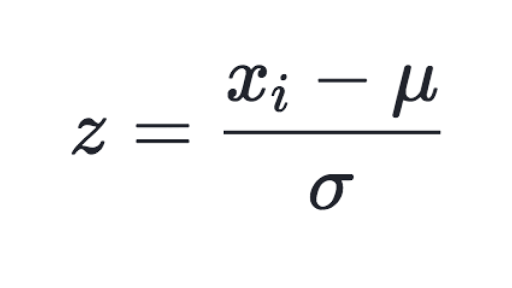


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data1.drop(["Outcome"],axis = 1),),
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
X.head()

In [ ]:
y = data1.Outcome

# Modelling using xgboost

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

### Train , Test data Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

### XGBOOST

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

In [ ]:
preds = xg_reg.predict(X_test)

In [ ]:
preds

In [ ]:
preds1=[]
n= len(preds)
for i in range(n):
    if(preds[i]>=0.5):
        preds1.append(1)
    else:
        preds1.append(0)

In [ ]:
preds1

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds1)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

In [ ]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)


plt.title('KNN with Diabetes Data')
plt.show()

## Model performance analysis

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:


plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

In [ ]:
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))